In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

In [4]:
def salt_and_pepper_noise(images, noise_level=0.5):
    noisy_images = images.copy()
    for image in noisy_images:
        mask = np.random.choice([0, 1, 2], size=image.shape, p=[noise_level/2, 1-noise_level, noise_level/2])
        salt_mask = mask == 0
        pepper_mask = mask == 2
        image[salt_mask] = 1
        image[pepper_mask] = 0
    return noisy_images

In [5]:
x_train_noisy = salt_and_pepper_noise(x_train)
x_test_noisy = salt_and_pepper_noise(x_test)

In [6]:
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [7]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
469/469 [==============================] - 77s 158ms/step - loss: 0.1904 - val_loss: 0.1469
Epoch 2/10
469/469 [==============================] - 75s 160ms/step - loss: 0.1414 - val_loss: 0.1354
Epoch 3/10
469/469 [==============================] - 74s 158ms/step - loss: 0.1330 - val_loss: 0.1288
Epoch 4/10
469/469 [==============================] - 73s 156ms/step - loss: 0.1273 - val_loss: 0.1242
Epoch 5/10
469/469 [==============================] - 72s 154ms/step - loss: 0.1229 - val_loss: 0.1198
Epoch 6/10
469/469 [==============================] - 71s 151ms/step - loss: 0.1190 - val_loss: 0.1165
Epoch 7/10
469/469 [==============================] - 71s 151ms/step - loss: 0.1160 - val_loss: 0.1138
Epoch 8/10
469/469 [==============================] - 70s 150ms/step - loss: 0.1136 - val_loss: 0.1125
Epoch 9/10
469/469 [==============================] - 71s 151ms/step - loss: 0.1117 - val_loss: 0.1099
Epoch 10/10
469/469 [==============================] - 71s 150ms/step - l

In [8]:
denoised_images = autoencoder.predict(x_test_noisy)

313/313 [==============================] - 4s 13ms/step


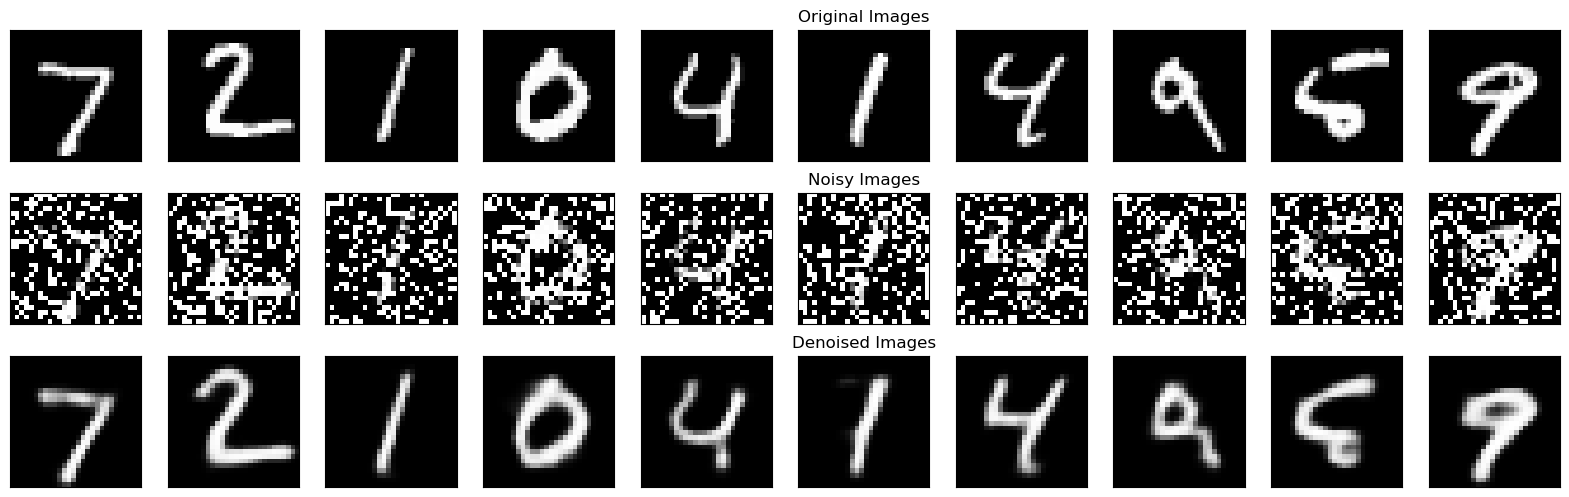

In [9]:
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
   
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Images')

   
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(denoised_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Denoised Images')
plt.show()
